In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [7]:
model=Sequential()

In [8]:
model.add(Dense(units=16,activation='relu',input_shape=(2,),name="first"))

In [9]:
model.add(Dense(units=4,activation='relu',name="second"))
model.add(Dense(units=1,activation='sigmoid',name="output"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 16)                48        
_________________________________________________________________
second (Dense)               (None, 4)                 68        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [11]:
from sklearn.datasets import make_blobs

In [12]:
X,y=make_blobs(500,2,centers=2,random_state=5)

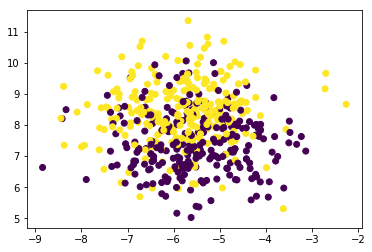

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.2,random_state=2)

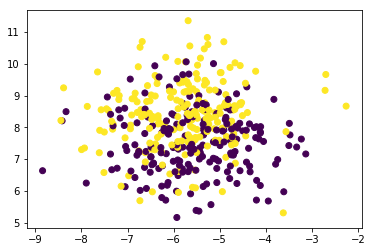

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

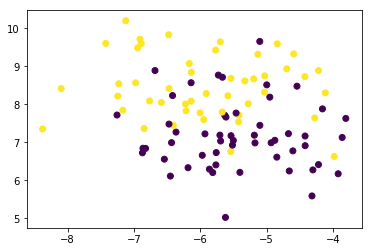

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

In [18]:
hist=model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_test,Y_test))

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 0s 641us/step - loss: 0.7333 - accuracy: 0.4925 - val_loss: 0.7084 - val_accuracy: 0.5300
Epoch 2/100
400/400 [==============================] - 0s 47us/step - loss: 0.7100 - accuracy: 0.4925 - val_loss: 0.6968 - val_accuracy: 0.5300
Epoch 3/100
400/400 [==============================] - 0s 67us/step - loss: 0.6977 - accuracy: 0.4925 - val_loss: 0.6938 - val_accuracy: 0.5300
Epoch 4/100
400/400 [==============================] - 0s 62us/step - loss: 0.6944 - accuracy: 0.4925 - val_loss: 0.6937 - val_accuracy: 0.5300
Epoch 5/100
400/400 [==============================] - 0s 65us/step - loss: 0.6938 - accuracy: 0.4925 - val_loss: 0.6937 - val_accuracy: 0.5100
Epoch 6/100
400/400 [==============================] - 0s 80us/step - loss: 0.6934 - accuracy: 0.4375 - val_loss: 0.6936 - val_accuracy: 0.4900
Epoch 7/100
400/400 [==============================] - 0s 60us/step - loss: 0.6929 - accu

In [19]:
res=hist.history

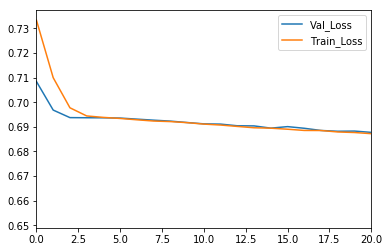

In [20]:
plt.xlim((0,20))
plt.plot(res['val_loss'],label='Val_Loss')
plt.plot(res['loss'],label='Train_Loss')
plt.legend()
plt.show()

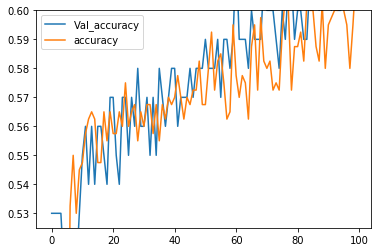

In [21]:
plt.ylim((.525,.600))
plt.plot(res['val_accuracy'],label='Val_accuracy')
plt.plot(res['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [22]:
y_pred=model.predict_classes(X_test)

In [23]:
y_pred=y_pred.reshape(-1,)


In [24]:
(y_pred==Y_test).mean()

0.62

# Moon Dataset

In [25]:
from sklearn.datasets import make_moons

In [26]:
X,Y=make_moons(n_samples=500,noise=.2)

In [27]:
X.shape,Y.shape

((500, 2), (500,))

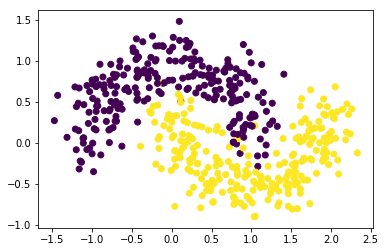

In [28]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [29]:
hist=model.fit(X,Y,batch_size=32,epochs=100,validation_split=.2)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 0s 60us/step - loss: 0.7169 - accuracy: 0.5175 - val_loss: 0.7373 - val_accuracy: 0.4300
Epoch 2/100
400/400 [==============================] - 0s 87us/step - loss: 0.6862 - accuracy: 0.5175 - val_loss: 0.6987 - val_accuracy: 0.4300
Epoch 3/100
400/400 [==============================] - 0s 132us/step - loss: 0.6509 - accuracy: 0.5175 - val_loss: 0.6630 - val_accuracy: 0.4300
Epoch 4/100
400/400 [==============================] - 0s 87us/step - loss: 0.6157 - accuracy: 0.5175 - val_loss: 0.6269 - val_accuracy: 0.4300
Epoch 5/100
400/400 [==============================] - 0s 62us/step - loss: 0.5872 - accuracy: 0.5175 - val_loss: 0.6027 - val_accuracy: 0.4300
Epoch 6/100
400/400 [==============================] - 0s 72us/step - loss: 0.5677 - accuracy: 0.5175 - val_loss: 0.5836 - val_accuracy: 0.4300
Epoch 7/100
400/400 [==============================] - 0s 70us/step - loss: 0.5505 - accu

In [30]:
res=hist.history

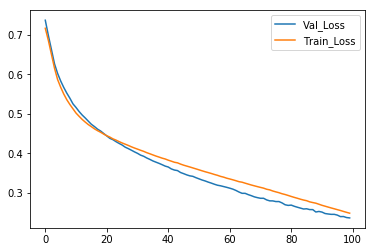

In [31]:

plt.plot(res['val_loss'],label='Val_Loss')
plt.plot(res['loss'],label='Train_Loss')
plt.legend()
plt.show()

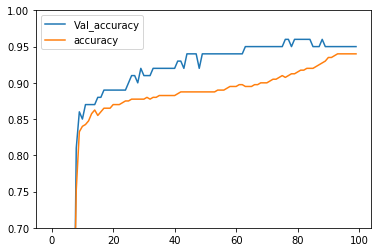

In [32]:
plt.ylim((.7,1))
plt.plot(res['val_accuracy'],label='Val_accuracy')
plt.plot(res['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [33]:
import visualize 

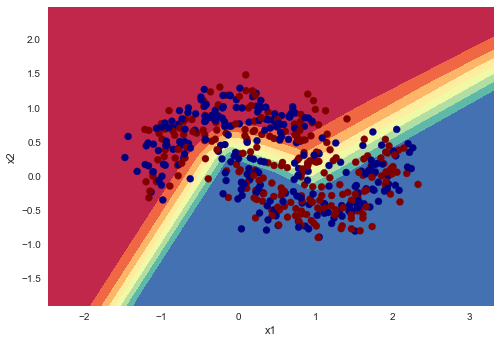

In [35]:
visualize.plot_decision_boundary(lambda x: model.predict(x),X,y)
